In [1]:
from simulation.simulations.data_generator import DataGenerator, get_single_training_example
from TransformerMOT.util.load_config_files import load_yaml_into_dotdict


In [2]:
params = load_yaml_into_dotdict("configs/models/BOMTv1.yaml")
params.update(load_yaml_into_dotdict("configs/tasks/task1.yaml"))

data_generator = DataGenerator(params)

In [3]:
training_nested_tensor, labels, unique_measurement_ids = data_generator.get_batch()

In [4]:
(truncated_sensors_timestamps,
truncated_targets_timestamps,
truncated_sensors_velocities,
truncated_targets_velocities,
truncated_angles,) = data_generator.raw_data

In [5]:
truncated_sensors_timestamps.shape

(3, 100, 2)

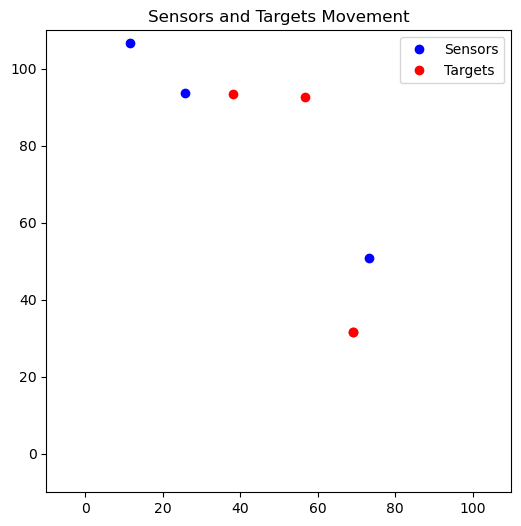

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-10, 110)
ax.set_ylim(-10, 110)
ax.set_title("Sensors and Targets Movement")

# Plot objects for sensors & targets
sensor_dots, = ax.plot([], [], 'bo', markersize=6, label="Sensors")  # Blue dots
target_dots, = ax.plot([], [], 'ro', markersize=6, label="Targets")  # Red dots

ax.legend()

def update(frame):
    """ Update function for animation """
    sensor_dots.set_data(truncated_sensors_timestamps[:, frame, 0], truncated_sensors_timestamps[:, frame, 1])  # Update sensor positions
    target_dots.set_data(truncated_targets_timestamps[:, frame, 0], truncated_targets_timestamps[:, frame, 1])  # Update target positions
    return sensor_dots, target_dots

# Create animation
ani = animation.FuncAnimation(fig, update, frames=truncated_sensors_timestamps.shape[1], interval=10, blit=True)

ani.save("time_based_animation.gif", writer="pillow", fps=60)

In [7]:
def attach_time(data: np.ndarray, interval):
    M, N, t, k = data.shape  # Extract current shape
    new_row = np.arange(t) * interval  # Shape (t,)

    # Reshape to (M, N, t, 1) for broadcasting
    new_row = new_row.reshape(1, 1, t, 1)

    # Repeat across M and N to match the shape
    new_row = np.tile(new_row, (M, N, 1, 1))

    # Concatenate along the last axis (k)
    return np.concatenate([data, new_row], axis=-1)

In [8]:
labels

[tensor([[ 26.5843,  21.4962,   2.5171,  15.7867],
         [ 25.1368,  11.9270,  -2.1907, -12.9262],
         [ 46.1254,  57.5035,  11.1306, -12.5913],
         [ 69.0855,  31.5302,   0.0000,   0.0000]], device='cuda:0'),
 tensor([[ 30.1082,  43.5975,   2.5171,  15.7867],
         [ 27.0929,  24.6862,   4.0968,  25.6942],
         [ 61.7082,  39.8757,  11.1306, -12.5913],
         [ 69.0855,  31.5302,   0.0000,   0.0000]], device='cuda:0'),
 tensor([[33.3804, 64.1202,  2.5171, 15.7867],
         [32.4187, 58.0886,  4.0968, 25.6942],
         [69.0855, 31.5302,  0.0000,  0.0000],
         [69.0855, 31.5302,  0.0000,  0.0000]], device='cuda:0'),
 tensor([[36.6526, 84.6429,  2.5171, 15.7867],
         [38.0703, 93.5344,  0.0000,  0.0000],
         [69.0855, 31.5302,  0.0000,  0.0000],
         [69.0855, 31.5302,  0.0000,  0.0000]], device='cuda:0'),
 tensor([[56.7794, 92.6356, 20.7879, -0.9987],
         [38.0703, 93.5344,  0.0000,  0.0000],
         [69.0855, 31.5302,  0.0000,  0.0000],